## Введение в DS на УБ и МиРА (2022)
### Домашнее задание #5:  Ближайшие соседи
Дедлайн: 19 июня 2022 года, 23:59
Правила игры

Домашнее задание состоит из двух частей, которые оцениваются в 3 - 7 балла. Все пункты в пределах одной части имеют одинаковый вес.

Решения принимаются до 19 июня 2022 года, 23:59 МСК включительно. Работы, отправленные после дедлайна, не проверяются. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

Все решения нужно загрузить в личный репозиторий на GitHub Classroom.

Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

Плагиат не допускается. При обнаружении случаев списывания, 
0
 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import scipy
plt.style.use('ggplot')

 ---

В этом задании будем предсказывать удовлетворенность студентов их программой (`LikeDegree`). Скачайте  Student_Behaviour.csv, содержащую информацию о студентов бакалавриата.


### Часть 1: Исследуем данные
**Задание 1.** Загрузите данные из файла Student_Behaviour.csv. Выведите первые 5 строк таблицы.

In [2]:
df = pd.read_csv('Student_Behaviour.csv')
df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


**Задание 2.** Проверьте колонки на наличие пропусков, избавьтесь их. 

In [3]:
df.isnull().sum()

CertificationCourses    0
Gender                  0
Department              0
Height(CM)              0
Weight(KG)              0
10Mark                  0
12Mark                  0
CollegeMark             0
Hobbies                 0
DailyStudingTime        0
PreferToStudyIn         0
SalaryExpectation       0
LikeDegree              0
CareerBasedonDegree     0
GamesSpendingTime       0
TravellingTime          0
StressLevel             0
FinancialStatus         0
PartTimeJob?            0
dtype: int64

**Задание 3.**  Колонку `CareerBasedonDegree` приведите к числовому виду.

In [4]:
df['CareerBasedonDegree'] = df['CareerBasedonDegree'].str.replace('%','')

In [5]:
df['CareerBasedonDegree'] = df['CareerBasedonDegree'].astype('int')

**Задание 4.**  В датасете есть 3 поля, с суффиксом `Time`, данные в них строковые, которые означают временной интервал. Извлеките минимальное время(левую границу интервала) для каждой из этих переменных и переведите в минуты, запишите в новые столбцы, удалите старые.

In [6]:
def new_DailyStudingTime(x):
    if x.loc['DailyStudingTime'] == '0 - 30 minute':
        return 0
    elif x.loc['DailyStudingTime'] == '30 - 60 minute':
        return 30
    elif x.loc['DailyStudingTime'] == '1 - 2 Hour':
        return 60
    elif x.loc['DailyStudingTime'] == '2 - 3 hour':
        return 120
    elif x.loc['DailyStudingTime'] == '3 - 4 hour':
        return 180 
    elif x.loc['DailyStudingTime'] == 'More Than 4 hour':
        return 240

    
def new_GamesSpendingTime(x):
    if x.loc['GamesSpendingTime'] == '0 Minute':
        return 0
    elif x.loc['GamesSpendingTime'] == '1 - 30 Minute':
        return 1
    elif x.loc['GamesSpendingTime'] == '30 - 60 Minute':
        return 30
    elif x.loc['GamesSpendingTime'] == '1 - 1.30 hour':
        return 60
    elif x.loc['GamesSpendingTime'] == '1.30 - 2 hour':
        return 90
    elif x.loc['GamesSpendingTime'] == 'More than 2 hour':
        return 60
   
def new_TravellingTime(x):
    if x.loc['TravellingTime '] == '0 - 30 minutes':
        return 0
    elif x.loc['TravellingTime '] == '30 - 60 minutes':
        return 30
    elif x.loc['TravellingTime '] == '1 - 1.30 hour':
        return 60
    elif x.loc['TravellingTime '] == '1.30 - 2 hour':
        return 90
    elif x.loc['TravellingTime '] == '2 - 2.30 hour':
        return 120
    elif x.loc['TravellingTime '] == '2.30 - 3 hour':
        return 150
    elif x.loc['TravellingTime '] == 'more than 3 hour':
        return 180



df['new_DStudingTime'] = df[['DailyStudingTime']].apply(new_DailyStudingTime, axis=1)
df['new_GamesSTime'] = df[['GamesSpendingTime']].apply(new_GamesSpendingTime, axis=1)
df['new_TTime'] = df[['TravellingTime ']].apply(new_TravellingTime, axis=1)

df = df.drop(columns='DailyStudingTime')
df = df.drop(columns='GamesSpendingTime')
df = df.drop(columns='TravellingTime ')

df.head(1000)

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,StressLevel,FinancialStatus,PartTimeJob?,new_DStudingTime,new_GamesSTime,new_TTime
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,Morning,40000,No,50,Bad,Bad,No,0,90,30
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,Morning,15000,Yes,75,Bad,Bad,No,30,60,0
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,Anytime,13000,Yes,50,Awful,Bad,No,60,60,30
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,Anytime,1500000,No,50,Bad,good,No,60,90,0
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,Morning,50000,Yes,25,Good,good,No,30,90,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Yes,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,Morning,7000,Yes,50,Bad,Bad,No,30,60,30
231,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,Anytime,25000,Yes,75,Good,good,No,120,30,30
232,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,Night,20000,Yes,50,Bad,good,No,30,30,150
233,Yes,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,Anytime,20000,Yes,75,Awful,good,No,0,60,150


**Задание 5.**  Выбрете колонки (непрерывные переменные), которые будете использовать для предсказания целевой переменной с помощью knn

In [7]:
real_variables = ['Height(CM)', 'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'SalaryExpectation', 'CareerBasedonDegree', 'new_DStudingTime', 'new_GamesSTime', 'new_TTime']

**Задание 6.**  Есть ли в выбранных колонках выбросы? (Пока не нужно их чистить)

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd10eed520>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd10eedc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd10eed190>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd10ef83a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd10ef8730>],
 'means': []}

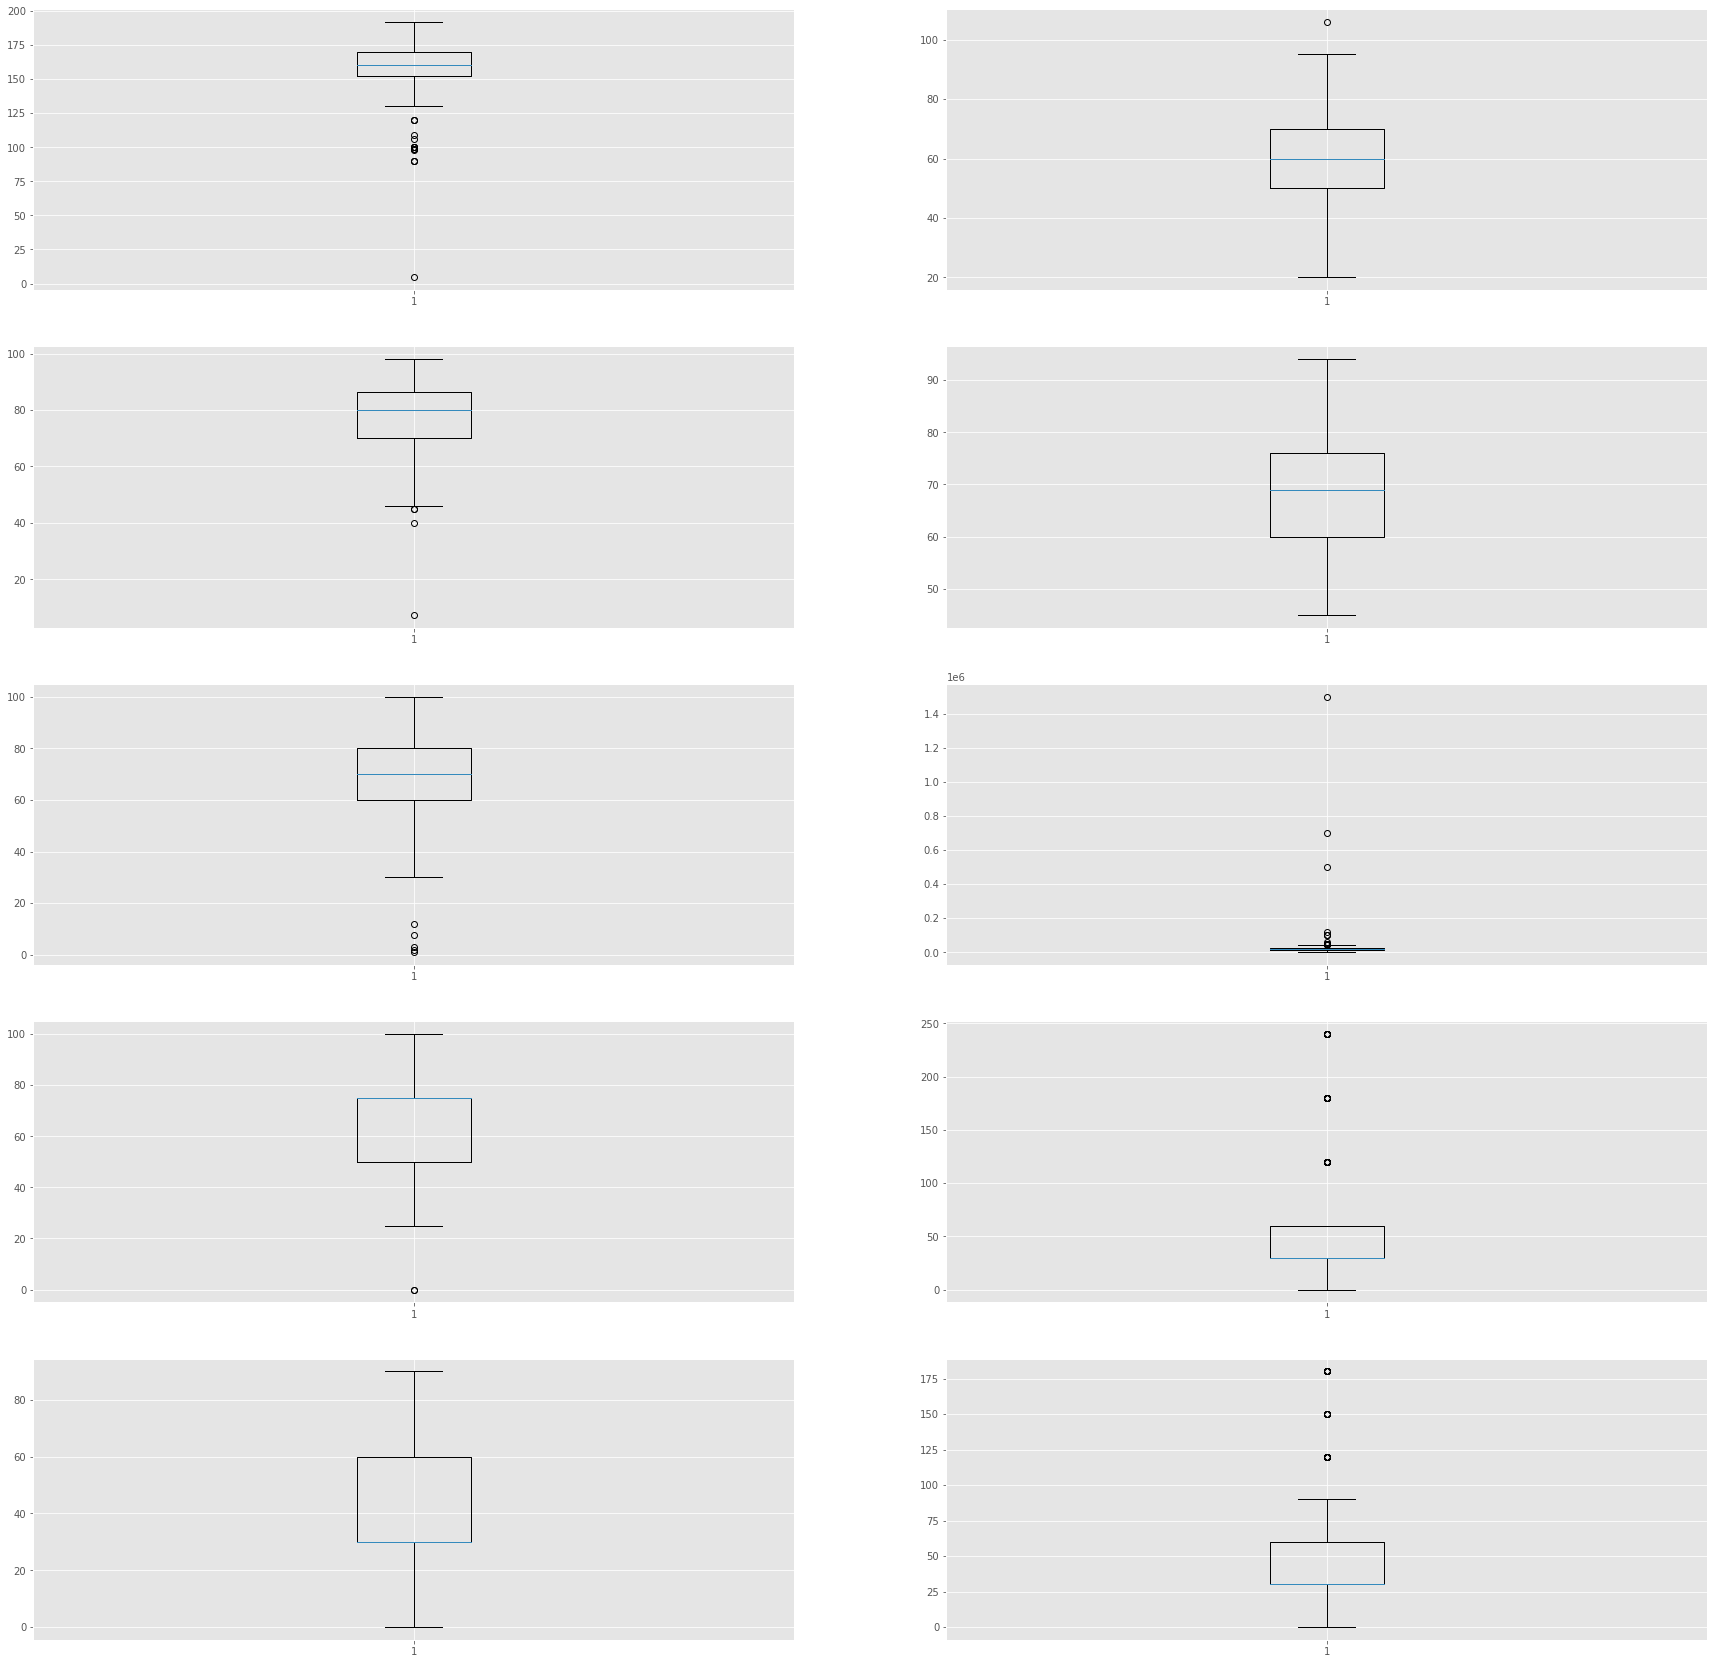

In [8]:
fig, ax = plt.subplots(5, 2, figsize=(30,30))
ax[0,0].boxplot(df['Height(CM)'])
ax[0,1].boxplot(df['Weight(KG)'])
ax[1,0].boxplot(df['10Mark'])
ax[1,1].boxplot(df['12Mark'])
ax[2,0].boxplot(df['CollegeMark'])
ax[2,1].boxplot(df['SalaryExpectation'])
ax[3,0].boxplot(df['CareerBasedonDegree'])
ax[3,1].boxplot(df['new_DStudingTime'])
ax[4,0].boxplot(df['new_GamesSTime'])
ax[4,1].boxplot(df['new_TTime'])

Выбросы есть в переменных : Height(CM), Weight(KG), 10Mark, CollegeMark, SalaryExpectation, CareerBasedonDegree, new_DStudingTime, new_TTime

**Задание 7.**  Как распределена целевая переменная? Нет ли дисбаланса классов? Если есть дисбаланс, какие метрики качества классификатора можно использовать, какие нет? Рассматриваем метрики, которые проходили в рамках курса.

<AxesSubplot:>

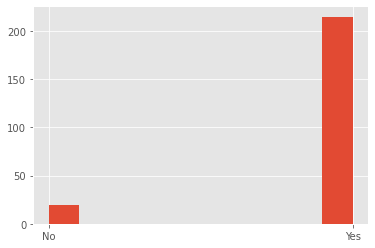

In [9]:
df['LikeDegree'].hist()

**Задание 8.**  Переведите целевую переменную к численному формату.

In [10]:
dff = df
dff['LikeDegree'] = dff['LikeDegree'].replace('Yes', 1)
dff['LikeDegree'] = dff['LikeDegree'].replace('No', 0)

### Часть 2: Строим модели
**Задание 1.** Разбейте выборку на обучающую и тестовую. 

In [11]:
df.LikeDegree.value_counts()

1    215
0     20
Name: LikeDegree, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state=201905, stratify=df['LikeDegree'])

print("Размер обучающей выборки:", train.shape)
print("Размер тестовой выборки:", test.shape)

Размер обучающей выборки: (188, 19)
Размер тестовой выборки: (47, 19)


In [13]:
y_train = 1 * (train.LikeDegree.to_numpy() == 1)
y_train

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
y_test = 1 * (test.LikeDegree.to_numpy() == 1)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1])

In [15]:
X_train = train[real_variables].to_numpy()
X_test = test[real_variables].to_numpy()

**Задание 2.** Постройте наивную модель предсказания для целевой переменной. Наивная модель - это самая простая модель, без сложных зависимостей. Например, для регрессии наивная модель - среднее для целевой переменной (см. семинар 11). В данном случае наивной моделью может быть преположение "все студенты (не)довольны".

In [16]:
# В задании 7 на графике видно, что самый частый ответ - это да, то есть 1. Значит в теории наивная модель может предсказывать ответ да.
# в семинаре 11 брали среднее, но тут для упрощения можно и без этого.
y_pred_naive = np.ones(len(y_test))
y_pred_naive

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Задание 3.** Постройте модели ближайших соседей для 3, 5, 7 ближайших соседей. 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Модель для 3 ближайших соседей
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_knn_3 = knn_3.predict(X_test)


# Модель для 5 ближайших соседей
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_knn_5 = knn_5.predict(X_test)

# Модель для 7 ближайших соседей
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
y_pred_knn_7 = knn_7.predict(X_test)

**Задание 4.** Постройте метрики качества на тестовой выборке (3 известных вам) для моделей из 1 и 2 задания и сравните между собой. Какая победила? 

In [18]:
from sklearn import metrics
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

# https://scikit-learn.org/stable/modules/model_evaluation.html

In [19]:
print('Метрика Precision')
print('Precision для наивной модели:  ', precision_score(y_test, y_pred_naive))
print('Precision для 3 соседей:  ', precision_score(y_test, y_pred_knn_3))
print('Precision для 5 соседей:  ', precision_score(y_test, y_pred_knn_5))
print('Precision для 7 соседей:  ', precision_score(y_test, y_pred_knn_7))

print('Метрика F1_score')
print('F1_score для наивной модели:  ', f1_score(y_test, y_pred_naive))
print('F1_score для 3 соседей:  ', f1_score(y_test, y_pred_knn_3))
print('F1_score для 5 соседей:  ', f1_score(y_test, y_pred_knn_5))
print('F1_score для 7 соседей:  ', f1_score(y_test, y_pred_knn_7))

print('Метрика recall_score')
print('Recall_score для наивной модели:  ', recall_score(y_test, y_pred_naive))
print('Recall_score для 3 соседей:  ', recall_score(y_test, y_pred_knn_3))
print('Recall_score для 5 соседей:  ', recall_score(y_test, y_pred_knn_5))
print('Recall_score для 7 соседей:  ', recall_score(y_test, y_pred_knn_7))

Метрика Precision
Precision для наивной модели:   0.9148936170212766
Precision для 3 соседей:   0.9148936170212766
Precision для 5 соседей:   0.9148936170212766
Precision для 7 соседей:   0.9148936170212766
Метрика F1_score
F1_score для наивной модели:   0.9555555555555556
F1_score для 3 соседей:   0.9555555555555556
F1_score для 5 соседей:   0.9555555555555556
F1_score для 7 соседей:   0.9555555555555556
Метрика recall_score
Recall_score для наивной модели:   1.0
Recall_score для 3 соседей:   1.0
Recall_score для 5 соседей:   1.0
Recall_score для 7 соседей:   1.0


**Задание 5.** Примените шкалирование (MinMax, обучите его на обучающей выборке к факторам, затем примените к тестовой), снова постройте модели для нескольких вариантов соседей (3, 5, 7). Помогло ли шкалирование? 

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
scaler.fit(X_train) 
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)

In [22]:
# MinMax для 3 ближайших соседей
knn_3.fit(X_train, y_train)
y_pred_knn_3 = knn_3.predict(X_test)

# MinMax для 5 ближайших соседей
knn_5.fit(X_train, y_train)
y_pred_knn_5 = knn_5.predict(X_test)

# MinMax для 7 ближайших соседей
knn_7.fit(X_train, y_train)
y_pred_knn_7 = knn_7.predict(X_test)

In [24]:
print('Метрика Precision')
print('Precision для 3 соседей:  ', precision_score(y_test, y_pred_knn_3))
print('Precision для 5 соседей:  ', precision_score(y_test, y_pred_knn_5))
print('Precision для 7 соседей:  ', precision_score(y_test, y_pred_knn_7))

print('Метрика F1_score')
print('F1_score для 3 соседей:  ', f1_score(y_test, y_pred_knn_3))
print('F1_score для 5 соседей:  ', f1_score(y_test, y_pred_knn_5))
print('F1_score для 7 соседей:  ', f1_score(y_test, y_pred_knn_7))

print('Метрика recall_score')
print('Recall_score для 3 соседей:  ', recall_score(y_test, y_pred_knn_3))
print('Recall_score для 5 соседей:  ', recall_score(y_test, y_pred_knn_5))
print('Recall_score для 7 соседей:  ', recall_score(y_test, y_pred_knn_7))

Метрика Precision
Precision для 3 соседей:   0.9148936170212766
Precision для 5 соседей:   0.9148936170212766
Precision для 7 соседей:   0.9148936170212766
Метрика F1_score
F1_score для 3 соседей:   0.9555555555555556
F1_score для 5 соседей:   0.9555555555555556
F1_score для 7 соседей:   0.9555555555555556
Метрика recall_score
Recall_score для 3 соседей:   1.0
Recall_score для 5 соседей:   1.0
Recall_score для 7 соседей:   1.0


**Задание 6.** Избавьтесь от выбросов в исходной выборке, затем снова разделите ее на тестовую и обучающую, постройте модель для нескольких вариантов числа соседей(3, 5, 7). Какое число соседей лучшее и почему? Улучшилось ли качество модели по сравнению со лучшей моделью, в которой было применено шкалирование из задания 5?

In [31]:
#удалим выбросы 
df = df[(df['10Mark']>45)] 
df = df[(df['Height(CM)']>125)] 
df = df[(df['Weight(KG)']<100)] 
df = df[(df['CollegeMark']>40)] 
df = df[(df['CollegeMark']>20)] 
df = df[(df['new_TTime']<100)] 
df = df[(df['CareerBasedonDegree']>20)] 
df = df[(df['new_DStudingTime']<100)] 

In [34]:
X = df.drop('LikeDegree', axis=1)
y = df['LikeDegree']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [41]:
df["LikeDegree"] = df["LikeDegree"].map({'Yes': 1, 'No': 0}).values

In [42]:
# Модель для 3 ближайших соседей
knn_3.fit(X_train, y_train)
y_pred_knn_3 = knn_3.predict(X_test)

# Модель для 5 ближайших соседей
knn_5.fit(X_train, y_train)
y_pred_knn_5 = knn_5.predict(X_test)

# Модель для 7 ближайших соседей
knn_7.fit(X_train, y_train)
y_pred_knn_7 = knn_7.predict(X_test)

ValueError: could not convert string to float: 'Yes'

**Задание 7.** Какая конфигурация модели получилась лучшей? Почему?Выбираем из всех построенных моделей, не забудьте про наивный прогноз и все рассмотренне варианты числа соседей. 